In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
path = r"C:\Users\NT550009\Desktop\11st\sample_df( '3569992365', '3556338225' ).xlsx"
df = pd.read_excel(path)

In [4]:
df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365


In [7]:
practice_df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35],
    'hobby': ['reading', 'swimming', 'painting']
})

# name 컬럼을 하나의 문자열로 합치기 (띄어쓰기를 유지하면서)
merged_col = practice_df['name'].str.cat(sep=' ')

# 합친 문자열을 텍스트 파일로 저장하기
with open('merged_col.txt', 'w') as f:
    f.write(merged_col)

In [9]:
# name 컬럼을 하나의 문자열로 합치기 (띄어쓰기를 유지하면서)
text_col = df["Text"].astype(str).str.cat(sep=' ')

# 합친 문자열을 텍스트 파일로 저장하기
with open('text_col.txt', 'w') as f:
    f.write(text_col)

In [10]:
text = open('text_col.txt').read()
wordcloud = WordCloud().generate(text)

In [12]:
wordcloud.words_

{'좋아요': 1.0,
 '잘': 0.5581395348837209,
 '사이즈': 0.5465116279069767,
 '좋습니다': 0.47674418604651164,
 '가성비': 0.38372093023255816,
 '생각보다': 0.3372093023255814,
 '좋네요': 0.32558139534883723,
 '만족합니다': 0.313953488372093,
 '사이즈가': 0.3023255813953488,
 '너무': 0.27906976744186046,
 '사이즈는': 0.27906976744186046,
 '좀': 0.26744186046511625,
 '아주': 0.2558139534883721,
 '딱': 0.2441860465116279,
 '조금': 0.22093023255813954,
 '저렴하게': 0.19767441860465115,
 '입기': 0.18604651162790697,
 '집에서': 0.18604651162790697,
 '그냥': 0.1744186046511628,
 '가격대비': 0.1744186046511628,
 '합니다': 0.16279069767441862,
 '좋고': 0.16279069767441862,
 '약간': 0.16279069767441862,
 '같아요': 0.1511627906976744,
 '한': 0.1511627906976744,
 '좋은': 0.1511627906976744,
 '더': 0.1511627906976744,
 '입고': 0.1511627906976744,
 '옷': 0.1511627906976744,
 '싸게': 0.1511627906976744,
 '옷이': 0.1511627906976744,
 '정말': 0.13953488372093023,
 '많이': 0.13953488372093023,
 '괜찮아요': 0.13953488372093023,
 '가격': 0.13953488372093023,
 '싸고': 0.13953488372093023,
 '크네요': 

In [15]:
import numpy as np


In [17]:
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

In [19]:
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)
nouns = df['Text'].apply(lambda x: kkma.nouns(str(x)))
nouns

0      [쿠폰, 2, 2만원정도, 만, 원, 정도, 6, 6벌이면, 벌, 이면, 만큼, 마...
1                                 [옷, 사이즈, 이, 이번, 번, 여름]
2                           [브랜드, 면, 줄기, 여름, 구매, 감사, 수고]
3                                         [침, 재질, 이너, 듯]
4      [생각, 정, 정사이즈, 사이즈, 거, 라지, 미듐샀더니가슴둘레, 타이트, 타이트합...
                             ...                        
795                                                  [0]
796                                              [옷, 품질]
797                                                 [재질]
798                                                  [넘]
799                                                  [0]
Name: Text, Length: 800, dtype: object

In [20]:
nouns = nouns.explode()
nouns

0         쿠폰
0          2
0      2만원정도
0          만
0          원
       ...  
796        옷
796       품질
797       재질
798        넘
799        0
Name: Text, Length: 3761, dtype: object

In [21]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()

df_word = df_word.query('count > = 2')
df_word 

,word,count
0,쿠폰,2.0
0,2만원정도,5.0
0,정도,2.0
0,6벌이면,4.0
0,이면,2.0
...,...,...
793,정사이즈사면,6.0
793,사이즈,3.0
793,사면,2.0
796,품질,2.0


In [22]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
451,사이즈,168
111,가격,85
181,구매,63
397,배송,62
332,만족,49
...,...,...
359,무료,1
360,무료배송,1
362,무조,1
363,무조건,1


In [23]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'사이즈': 168,
 '가격': 85,
 '구매': 63,
 '배송': 62,
 '만족': 49,
 '생각': 44,
 '성비': 38,
 '품질': 33,
 '주문': 31,
 '제품': 28,
 '정도': 28,
 '대비': 27,
 '재질': 27,
 '느낌': 23,
 '한국': 23,
 '구입': 21,
 '가격대비': 21,
 '감사': 20,
 '건조기': 19,
 '상품': 19,
 '두께': 19,
 '치수': 17,
 '티셔츠': 17,
 '국내': 17,
 '미국': 17,
 '105': 16,
 '색상': 15,
 '추천': 15,
 '원단': 15,
 '마음': 15,
 '세탁': 14,
 '최고': 14,
 '아마존': 13,
 '라지': 13,
 '우리': 12,
 '나라': 11,
 '이즈': 11,
 '110': 10,
 '포장': 10,
 '하나': 9,
 '정사이즈': 9,
 '소재': 9,
 '이너': 9,
 '우리나라': 9,
 '100': 9,
 '싸이즈': 8,
 '마감': 8,
 '길이': 8,
 '가성': 7,
 '웨어': 7,
 '시보리': 7,
 '운동': 7,
 '처음': 7,
 '여름': 7,
 '잠옷': 7,
 '소매': 7,
 '면도': 7,
 '흰색': 7,
 '11': 7,
 '해외': 7,
 '면티': 7,
 '아래': 7,
 '아이': 7,
 '착용': 6,
 '패스': 6,
 '수고': 6,
 '남편': 6,
 '우주': 6,
 '홈웨어': 6,
 '물건': 6,
 '보통': 6,
 '걱정': 6,
 '옷감': 6,
 '이번': 6,
 '아들': 6,
 '번째': 5,
 '다음': 5,
 '용도': 5,
 '한번': 5,
 '외출복': 5,
 '부분': 5,
 '해외배송': 5,
 '셔츠': 5,
 '대박': 5,
 '우주패스': 5,
 '타이트': 5,
 '쿠폰': 5,
 '크기': 5,
 '어깨': 5,
 '선택': 5,
 '기준': 5,
 '질감': 5,
 '한데': 5,
 '긴팔': 5

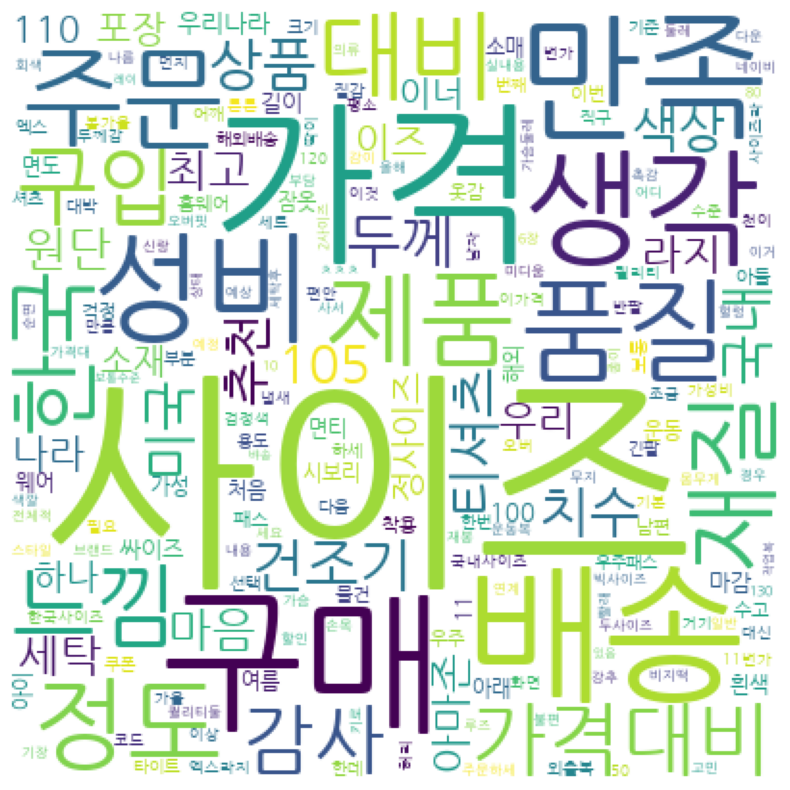

In [35]:
font_path = r"C:\Users\NT550009\Desktop\11st\NanumGothic.ttf"


wc = WordCloud(random_state = 123, width = 400,font_path = font_path,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('review_text_wordcloud') # 파일 저장